# Comparison of the results of the stable diffusion quantization

In [1]:
from optimum.intel.openvino import OVStableDiffusionPipeline
from diffusers import DDPMScheduler
from IPython.display import display

import torch
import random
import numpy as np

/home/alex/virt_envs/stable_diffusion/lib/python3.8/site-packages/openvino/offline_transformations/__init__.py:10: FutureWarning: The module is private and following namespace `offline_transformations` will be removed in the future, use `openvino.runtime.passes` instead!
  warnings.warn(


INFO:nncf:NNCF initialized successfully. Supported frameworks detected: torch, onnx, openvino


## Run the original pipeline
This pipeline was fine-tuned on the public [dataset](https://huggingface.co/datasets/lambdalabs/pokemon-blip-captions) with Pokemon images and the correspoinding captions. You can find the model and the description [here](https://huggingface.co/svjack/Stable-Diffusion-Pokemon-en).

In [ ]:
pipe = OVStableDiffusionPipeline.from_pretrained("svjack/Stable-Diffusion-Pokemon-en", export=True, compile=False)
pipe.reshape(batch_size=1, height=512, width=512, num_images_per_prompt=1)

pipe.compile()

In [ ]:
# Let's fix the seed for reproducibility.
np.random.seed(42)
random.seed(42)
torch.manual_seed(42)

prompt = "cartoon bird"
output = pipe(prompt, num_inference_steps=50, output_type="pil")
display(output.images[0])

## Run the quantized pipeline
Now we run the quantized pipeline that was obtained with Quantization-Aware Training on the same dataset. The original model was used as a baseline for quantization. The resulted model can be found [here](https://huggingface.co/OpenVINO/Stable-Diffusion-Pokemon-en-quantized).

In [2]:
quantized_pipe = OVStableDiffusionPipeline.from_pretrained("sd-quantized-1-5-pokemon/openvino", compile=False)
quantized_pipe.reshape(batch_size=1, height=512, width=512, num_images_per_prompt=1)
quantized_pipe.compile()

The config attributes {'requires_safety_checker': True, 'safety_checker': ['stable_diffusion', 'StableDiffusionSafetyChecker']} were passed to OVStableDiffusionPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
Compiling the encoder and creating the inference request ...
Compiling the encoder and creating the inference request ...
Compiling the encoder and creating the inference request ...


  0%|          | 0/50 [00:00<?, ?it/s]

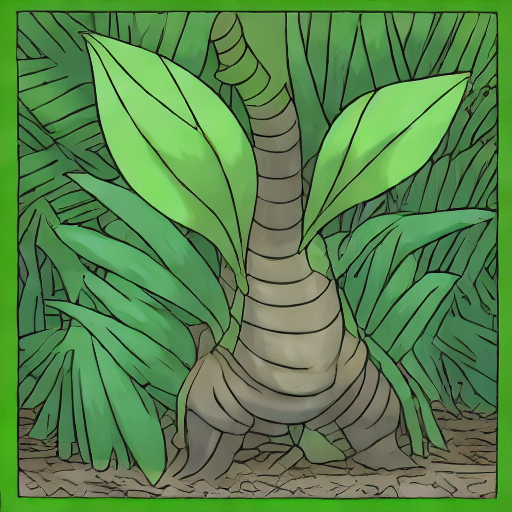

In [5]:
# Use the same seed to compare
np.random.seed(42)
random.seed(42)
torch.manual_seed(42)
prompt = "plant pokemon in jungle"#"a drawing of a green pokemon with red eyes"#"cartoon bird"

output = quantized_pipe(prompt, num_inference_steps=50, output_type="pil")
display(output.images[0])

Now you can see the difference of the difference in the results and the time required to generate the image.